In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Cleaned_data.csv")

In [3]:
df.head()

,Unnamed: 0,location,property_type,city,baths,purpose,bedrooms,Area_in_Marla,price
0,0,G-10,Flat,Islamabad,2,For Sale,2,4.0,10000000
1,1,E-11,Flat,Islamabad,3,For Sale,3,5.6,6900000
2,2,G-15,House,Islamabad,6,For Sale,5,8.0,16500000
3,4,DHA Defence,House,Islamabad,3,For Sale,3,8.0,7000000
4,5,E-11,Flat,Islamabad,2,For Sale,2,6.2,7800000


In [4]:
df = df[df['purpose'] == 'For Rent']

In [5]:
df.head()

,Unnamed: 0,location,property_type,city,baths,purpose,bedrooms,Area_in_Marla,price
21,22,DHA Defence,House,Islamabad,5,For Rent,5,20.0,110000
22,24,G-15,Lower Portion,Islamabad,2,For Rent,2,8.0,33000
23,25,others,House,Islamabad,5,For Rent,3,24.0,45000
24,26,F-7,House,Islamabad,4,For Rent,4,13.3,175000
25,27,others,Lower Portion,Islamabad,2,For Rent,2,5.0,17000


In [6]:
df.shape

(27455, 9)

In [7]:
df.price

21       110000
22        33000
23        45000
24       175000
25        17000
          ...  
97858     55000
97859    115000
97860     45000
97861    400000
97889     25000
Name: price, Length: 27455, dtype: int64

In [8]:
df.describe()

,Unnamed: 0,baths,bedrooms,Area_in_Marla,price
count,27455.000000,27455.000000,27455.000000,27455.000000,2.745500e+04
mean,53287.036533,3.210854,3.074158,10.780412,7.507634e+04
std,28898.140344,1.319897,1.177962,6.414600,1.227302e+05
min,22.000000,1.000000,1.000000,0.200000,1.550000e+04
25%,28761.500000,2.000000,2.000000,5.000000,3.100000e+04
50%,54288.000000,3.000000,3.000000,9.600000,5.000000e+04
75%,79802.500000,4.000000,4.000000,16.000000,8.475000e+04
max,99470.000000,7.000000,6.000000,26.000000,1.250000e+07


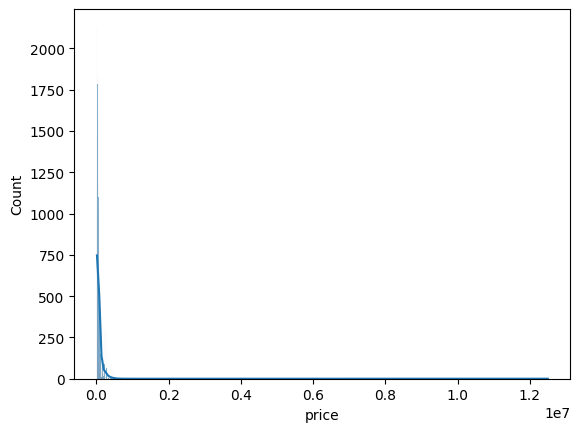

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='price', kde=True)
plt.show()

In [10]:
df.price.describe()

count    2.745500e+04
mean     7.507634e+04
std      1.227302e+05
min      1.550000e+04
25%      3.100000e+04
50%      5.000000e+04
75%      8.475000e+04
max      1.250000e+07
Name: price, dtype: float64

In [11]:
df = df[df['price'] < 1e6]  # e.g., keeping prices below 10 lakh (1 million)

In [12]:
df.price.describe()

count     27449.000000
mean      73995.807862
std       74351.517224
min       15500.000000
25%       31000.000000
50%       50000.000000
75%       84000.000000
max      950000.000000
Name: price, dtype: float64

In [13]:
df = df[df['price'] <900000]

In [14]:
df.describe()

,Unnamed: 0,baths,bedrooms,Area_in_Marla,price
count,27447.000000,27447.000000,27447.000000,27447.000000,27447.000000
mean,53281.223303,3.210624,3.073961,10.778635,73933.797136
std,28898.035283,1.319910,1.177992,6.413921,73998.163843
min,22.000000,1.000000,1.000000,0.200000,15500.000000
25%,28759.500000,2.000000,2.000000,5.000000,31000.000000
50%,54286.000000,3.000000,3.000000,9.600000,50000.000000
75%,79801.500000,4.000000,4.000000,16.000000,83500.000000
max,99470.000000,7.000000,6.000000,26.000000,850000.000000


## Model Building

In [15]:
X = df.drop(columns = ['price','purpose'],axis = 1)
y= df['price']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42 )

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Define and fit the encoder on both columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[['location','property_type', 'city']])

# 2. Transform the training data
encoded_train = pd.DataFrame(
    ohe.transform(X_train[['location','property_type', 'city']]),
    columns=ohe.get_feature_names_out(['location','property_type', 'city']),
    index=X_train.index
)

# 3. Transform the test data
encoded_test = pd.DataFrame(
    ohe.transform(X_test[['location','property_type', 'city']]),
    columns=ohe.get_feature_names_out(['location','property_type', 'city']),
    index=X_test.index
)

# 4. Drop the original columns and concatenate the encoded ones
X_train = X_train.drop(['location','property_type', 'city'], axis=1)
X_test = X_test.drop(['location','property_type', 'city'], axis=1)

X_train = pd.concat([X_train, encoded_train], axis=1)
X_test = pd.concat([X_test, encoded_test], axis=1)


In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train[['baths','bedrooms','Area_in_Marla'
                ]])

MinMaxScaler()

In [22]:
X_train[['baths','bedrooms','Area_in_Marla']] = scaler.transform(X_train[['baths','bedrooms','Area_in_Marla']])

In [23]:
X_test[['baths','bedrooms','Area_in_Marla']] = scaler.transform(X_test[['baths','bedrooms','Area_in_Marla']])

In [37]:
import xgboost as xgb

# Create and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1,random_state = 42,n_jobs = -1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 15950.8076171875
MSE: 970312704.0
R²: 0.8111467361450195


In [39]:

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), 
                           param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', 
                           cv=3)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


Linear Regression : 68 %


D:\ai-projects-env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\ai-projects-env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, ti

K Nearest Neighbours : 2 %
Decision Tree : 68 %
Random Forest : 80 %
AdaBoost : 42 %
Gradient Boosting Regressor : 80 %
XGBRegressor : 81 %
CatBoostRegressor : 83 %


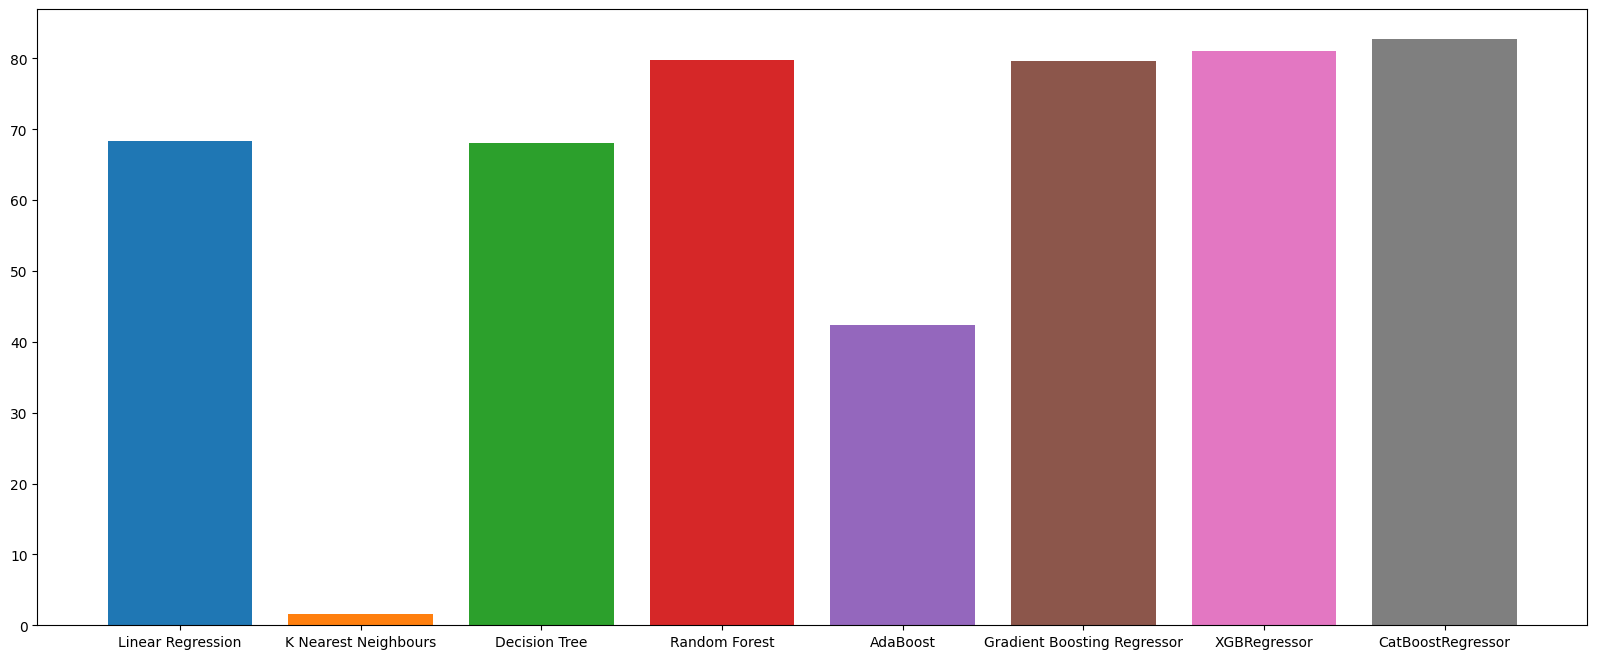

In [40]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor



lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [26]:
from catboost import CatBoostRegressor
model1 = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

In [27]:
model1.fit(X_train,y_train)

In [28]:
y_pred = model1.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8280267956253511
14792.394766424073


In [30]:
import pickle 
pickle.dump(model1,open('xgb_forRent.pkl','wb'))

In [31]:
import pickle
pickle.dump(ohe,open('ohe_forRent.pkl','wb'))

In [32]:
import pickle
pickle.dump(scaler,open('scaler_forRent.pkl','wb'))

In [33]:
import pickle 
pickle.dump(X_train.columns,open("feature_names_forRent.pkl","wb"))

In [34]:
X_train.columns

Index(['Unnamed: 0', 'baths', 'bedrooms', 'Area_in_Marla',
       'location_Adiala Road', 'location_Airport Housing Society',
       'location_B-17', 'location_Bahria Town', 'location_Bahria Town Karachi',
       'location_Bahria Town Rawalpindi', 'location_Bani Gala',
       'location_Cantt', 'location_Chaklala Scheme', 'location_Clifton',
       'location_DHA Defence', 'location_E-11', 'location_F-10',
       'location_F-11', 'location_F-6', 'location_F-7', 'location_F-8',
       'location_Federal B Area', 'location_G-10', 'location_G-11',
       'location_G-13', 'location_G-15', 'location_G-9', 'location_Gadap Town',
       'location_Ghauri Town', 'location_Gulberg',
       'location_Gulistan-e-Jauhar', 'location_Gulraiz Housing Scheme',
       'location_Gulshan-e-Iqbal Town', 'location_I-10', 'location_I-8',
       'location_Jamshed Town', 'location_Korangi', 'location_Malir',
       'location_Nazimabad', 'location_North Karachi',
       'location_North Nazimabad', 'location_PWD Ho